# Grouping Similar Images Using Pretrained CNN
Here I have used pretrained [**MobileNetV2**](https://keras.io/api/applications/mobilenet/#mobilenetv2-function).

Since the model is pretrained on ImageNet dataset the outputs without the softmax will be a vector of shape 1000. Similar images should have similar output vectors from the model. So we will group the similar images by
calculating the cosine angle between the vectors. If the images are similar then the cosine of angle between the vectors should be close to 1.

Importing Required Modules

In [2]:
from keras.applications import MobileNetV2
from keras.preprocessing import image
from tqdm import tqdm 
from PIL import Image
import numpy as np
import tensorflow as tf
import os
from numpy import savez_compressed
from numpy import load
%matplotlib inline
import matplotlib.pyplot as plt

Reading all the images in the directory

In [3]:
files = os.listdir('data')

Initializing a numpy array of zeros to store the encodings of the images

In [4]:
enc = np.zeros((len(files),1000))

Loading Pretrained MobileNetV2 model

In [5]:
model = MobileNetV2(classifier_activation=None)

Encoding all the images in the directory

In [6]:
for i in tqdm (range (len(files)), desc="Encoding files..",unit="file"):
	try:
		im = np.asarray(image.load_img('data/'+files[i],target_size=(224,224)))
		im = im[:,:,:3]/225
		e = model.predict(np.expand_dims(im, axis=0))
		enc[i,:]=e[0,:]
	except:
		print("Error reading image:"+files[i])

Encoding files..: 100%|██████████| 862/862 [05:01<00:00,  2.86file/s]


Saving the encodings incase you need it again.

In [7]:
savez_compressed("data.npz",enc)

Setting minimum cosine similarity required to group.
Set it to **0.99** to get duplicate images

In [55]:
similarity = 0.6

Comparing cosine similarities of all the images

In [56]:
data = {}

In [57]:
for i in tqdm (range(len(files)), desc="Comparing Images",unit="file"):
	for j in range(i+1,len(files)):
		cosineSimilarity = np.dot(enc[i,:],enc[j,:])/(np.linalg.norm(enc[i,:])*np.linalg.norm(enc[j,:]))
		if(cosineSimilarity>similarity):
			try:
				data[files[i]].append(files[j])
			except:
				data[files[i]] = [files[j]]

Comparing Images: 100%|██████████| 862/862 [00:06<00:00, 138.61file/s]


Merging images into groups

In [58]:
present = {}
newD = {}
for i in data:
	k = i
	try:
		if(present[i]['b']):
			k = present[i]['v']
	except:
		pass
	for j in data[i]:
		n = {}
		n['b']=True
		n['v']=k
		present[j]=n

for i in present:
	try:
		newD[present[i]['v']].append(i)
	except:
		newD[present[i]['v']] = [i]
l = 0
grpd = []
finalGroups={}
for i in newD:
	finalGroups['Group'+str(l)]=[i]
	grpd.append(i)
	for j in newD[i]:
		finalGroups['Group'+str(l)].append(j)
		grpd.append(j)
	l+=1
finalGroups['ungrouped']=[]
for f in files:
	if f not in grpd:
		finalGroups['ungrouped'].append(f)

Checking total no of groups formed

In [59]:
print(len(finalGroups))

112


In [60]:
finalGroups.keys()

dict_keys(['Group0', 'Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6', 'Group7', 'Group8', 'Group9', 'Group10', 'Group11', 'Group12', 'Group13', 'Group14', 'Group15', 'Group16', 'Group17', 'Group18', 'Group19', 'Group20', 'Group21', 'Group22', 'Group23', 'Group24', 'Group25', 'Group26', 'Group27', 'Group28', 'Group29', 'Group30', 'Group31', 'Group32', 'Group33', 'Group34', 'Group35', 'Group36', 'Group37', 'Group38', 'Group39', 'Group40', 'Group41', 'Group42', 'Group43', 'Group44', 'Group45', 'Group46', 'Group47', 'Group48', 'Group49', 'Group50', 'Group51', 'Group52', 'Group53', 'Group54', 'Group55', 'Group56', 'Group57', 'Group58', 'Group59', 'Group60', 'Group61', 'Group62', 'Group63', 'Group64', 'Group65', 'Group66', 'Group67', 'Group68', 'Group69', 'Group70', 'Group71', 'Group72', 'Group73', 'Group74', 'Group75', 'Group76', 'Group77', 'Group78', 'Group79', 'Group80', 'Group81', 'Group82', 'Group83', 'Group84', 'Group85', 'Group86', 'Group87', 'Group88', 'Group89', 'Group90'

Checking groups:

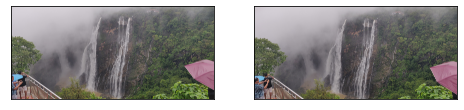

In [34]:
grp=finalGroups['Group100']
fig=plt.figure(figsize=(8, 8))
for i in range(len(grp)):
    img = Image.open("data/"+grp[i])
    ax = fig.add_subplot((len(grp)//min(len(grp),5))+(len(grp)%min(len(grp),5)), min(len(grp),5), i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img)
plt.show()

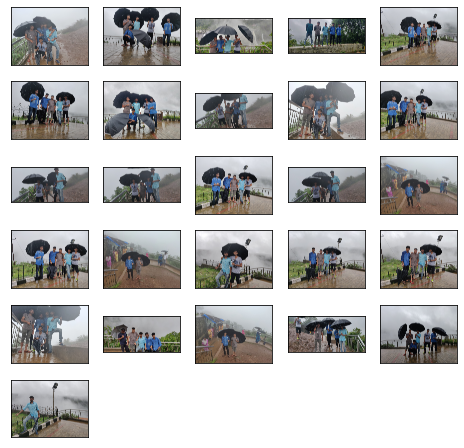

In [32]:
grp=finalGroups['Group19']

fig=plt.figure(figsize=(8, 8))
for i in range(len(grp)):
    img = Image.open("data/"+grp[i])
    ax = fig.add_subplot((len(grp)//5)+(len(grp)%5), 5, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img)
plt.show()

Finding duplicate images

In [38]:
similarity = 0.99

In [39]:
data = {}
for i in tqdm (range(len(files)), desc="Comparing Images",unit="file"):
	for j in range(i+1,len(files)):
		cosineSimilarity = np.dot(enc[i,:],enc[j,:])/(np.linalg.norm(enc[i,:])*np.linalg.norm(enc[j,:]))
		if(cosineSimilarity>similarity):
			try:
				data[files[i]].append(files[j])
			except:
				data[files[i]] = [files[j]]

Comparing Images: 100%|██████████| 862/862 [00:06<00:00, 123.73file/s]


In [40]:
present = {}
newD = {}
for i in data:
	k = i
	try:
		if(present[i]['b']):
			k = present[i]['v']
	except:
		pass
	for j in data[i]:
		n = {}
		n['b']=True
		n['v']=k
		present[j]=n

for i in present:
	try:
		newD[present[i]['v']].append(i)
	except:
		newD[present[i]['v']] = [i]
l = 0
grpd = []
finalGroups={}
for i in newD:
	finalGroups['Group'+str(l)]=[i]
	grpd.append(i)
	for j in newD[i]:
		finalGroups['Group'+str(l)].append(j)
		grpd.append(j)
	l+=1
finalGroups['ungrouped']=[]
for f in files:
	if f not in grpd:
		finalGroups['ungrouped'].append(f)

In [41]:
len(finalGroups)

18

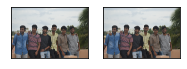

In [53]:
grp=finalGroups['Group9']
fig=plt.figure(figsize=(8, 8))
for i in range(len(grp)):
    img = Image.open("data/"+grp[i])
    ax = fig.add_subplot((len(grp)/5)+(len(grp)%5), 5, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img)
plt.show()